In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [65]:
df = pd.read_csv("canadaPerCapitaIncome.csv")
df = df.rename(columns={
    'per capita income (US$)':"Income",
    'year':'Year'
})
df1 = pd.DataFrame({
    'Year':[2017,2018,2019,2020],
    'Income':[45149,46313,46195,50100]
})
df = pd.concat([df,df1],ignore_index=True)
df

,Year,Income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


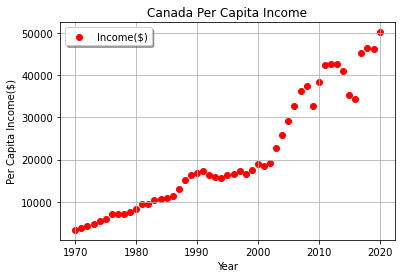

In [84]:
%matplotlib inline
plt.scatter(df.Year,df.Income,color='red',label='Income($)')
plt.xlabel('Year')
plt.ylabel('Per Capita Income($)')
plt.title("Canada Per Capita Income")
plt.legend(shadow=True)
plt.grid()
plt.show()

In [67]:
reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df.Income)

LinearRegression()

In [94]:
reg.predict([[2020]])

array([43302.62424674])

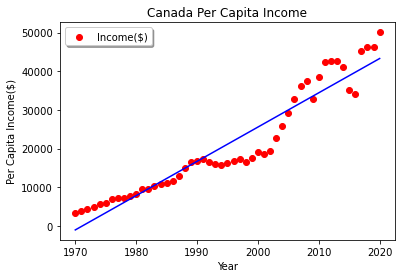

In [93]:
%matplotlib inline
plt.scatter(df.Year,df.Income,color='red',label='Income($)')
plt.xlabel('Year')
plt.ylabel('Per Capita Income($)')
plt.title("Canada Per Capita Income")
plt.legend(shadow=True)
plt.plot(df.Year,reg.predict(df[['Year']]),color='blue')

In [96]:
yearToPredictList = np.arange(2021,2051)
yearToPredictList

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [98]:
dframe = pd.DataFrame({
    'Years':yearToPredictList
})
dframe

,Years
0,2021
1,2022
2,2023
3,2024
4,2025
5,2026
6,2027
7,2028
8,2029
9,2030


In [101]:
predictedIncome = reg.predict(dframe)
predictedIncome

array([44190.02063466, 45077.41702259, 45964.81341051, 46852.20979844,
       47739.60618636, 48627.00257429, 49514.39896221, 50401.79535014,
       51289.19173806, 52176.58812599, 53063.98451391, 53951.38090183,
       54838.77728976, 55726.17367768, 56613.57006561, 57500.96645353,
       58388.36284146, 59275.75922938, 60163.15561731, 61050.55200523,
       61937.94839316, 62825.34478108, 63712.741169  , 64600.13755693,
       65487.53394485, 66374.93033278, 67262.3267207 , 68149.72310863,
       69037.11949655, 69924.51588448])

In [103]:
dframe['Predicted Income(CA$)'] = predictedIncome
dframe

,Years,Predicted Income(CA$)
0,2021,44190.020635
1,2022,45077.417023
2,2023,45964.813411
3,2024,46852.209798
4,2025,47739.606186
5,2026,48627.002574
6,2027,49514.398962
7,2028,50401.795350
8,2029,51289.191738
9,2030,52176.588126


In [105]:
dframe.to_csv("predictedPerCapitaIncomeOfCanada2021-2050.csv",index=False)

In [115]:
predictedPCICanada = pd.read_csv("predictedPerCapitaIncomeOfCanada2021-2050.csv")
predictedPCICanada

,Years,Predicted Income(CA$)
0,2021,44190.020635
1,2022,45077.417023
2,2023,45964.813411
3,2024,46852.209798
4,2025,47739.606186
5,2026,48627.002574
6,2027,49514.398962
7,2028,50401.795350
8,2029,51289.191738
9,2030,52176.588126


In [119]:
dframe["Predicted Income(CA$)"] = np.floor(dframe['Predicted Income(CA$)'])
dframe

,Years,Predicted Income(CA$)
0,2021,44190.0
1,2022,45077.0
2,2023,45964.0
3,2024,46852.0
4,2025,47739.0
5,2026,48627.0
6,2027,49514.0
7,2028,50401.0
8,2029,51289.0
9,2030,52176.0
